In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd


In [3]:
df=pd.read_csv('/content/drive/MyDrive/movie_project/diary_with_genres.csv')
df

,Date,Film,Rating,Genres
0,2025/06/07/,Final Destination,★★★,Horror
1,2025/06/01/,Shang-Chi and the Legend of the Ten Rings,★★★½,"Adventure, Fantasy, Action"
2,2025/05/31/,Lilo & Stitch,★★★½,"Science Fiction, Comedy, Family"
3,2025/05/26/,This Is the End,★★★,"Comedy, Action"
4,2025/05/24/,Get Smart,★★½,"Action, Thriller, Comedy"
...,...,...,...,...
135,2021/12/08/,House of Gucci,★★★½,"Drama, Crime, History"
136,2021/12/01/,"tick, tick... BOOM!",★★★★½,"Drama, Music"
137,2021/10/26/,Dune,★★★★,"Science Fiction, Adventure"
138,2021/10/10/,Cruella,★★★★,"Comedy, Adventure, Crime"


In [4]:
# Tarih sütunundaki fazladan '/' karakterini kaldır
df["Date"] = df["Date"].str.strip("/")

# Tarih biçimini belirt: yıl/ay/gün
df["Date"] = pd.to_datetime(df["Date"], format="%Y/%m/%d", errors="coerce")

In [5]:
df["Rating"].value_counts()

,count
Rating,
★★★½,36
★★★,35
★★★★,33
★★½,14
★★★★½,8
★★,6
★★★★★,4
★½,3
½,1


In [6]:
df["Genres"] = df["Genres"].fillna("").apply(lambda x: [genre.strip() for genre in x.split(",")])



In [7]:
df_exploded = df.explode("Genres")
df_exploded

,Date,Film,Rating,Genres
0,2025-06-07,Final Destination,★★★,Horror
1,2025-06-01,Shang-Chi and the Legend of the Ten Rings,★★★½,Adventure
1,2025-06-01,Shang-Chi and the Legend of the Ten Rings,★★★½,Fantasy
1,2025-06-01,Shang-Chi and the Legend of the Ten Rings,★★★½,Action
2,2025-05-31,Lilo & Stitch,★★★½,Science Fiction
...,...,...,...,...
138,2021-10-10,Cruella,★★★★,Adventure
138,2021-10-10,Cruella,★★★★,Crime
139,2021-07-09,Black Widow,★★★,Action
139,2021-07-09,Black Widow,★★★,Adventure


In [8]:
df_exploded["Genres"].value_counts()

,count
Genres,
Comedy,74
Drama,56
Action,47
Science Fiction,41
Adventure,39
Romance,30
Thriller,20
Crime,18
Fantasy,16


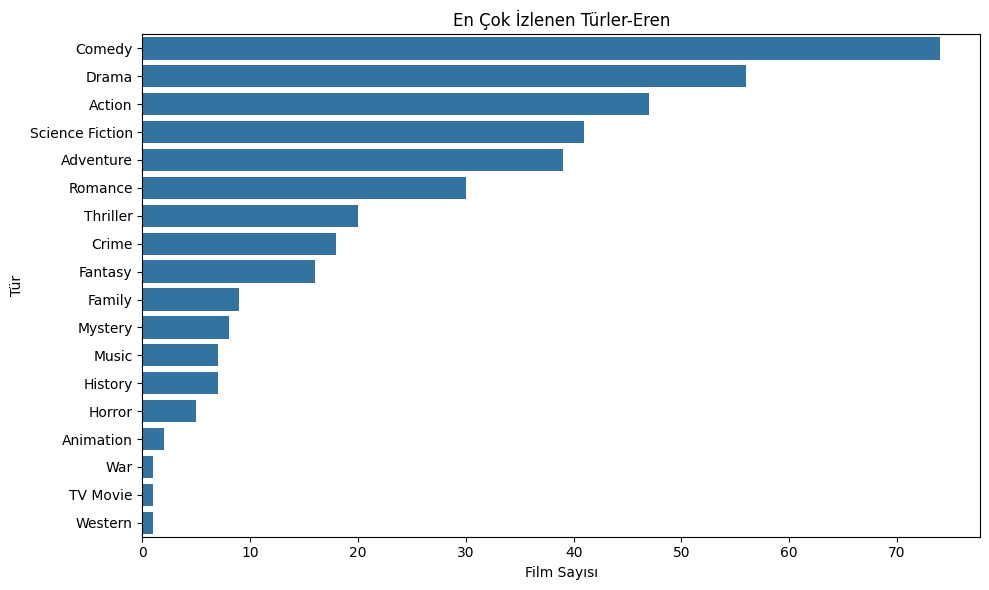

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(y="Genres", data=df_exploded, order=df_exploded["Genres"].value_counts().index)
plt.title("En Çok İzlenen Türler-Eren")
plt.xlabel("Film Sayısı")
plt.ylabel("Tür")
plt.tight_layout()
plt.show()


In [10]:
def star_to_float(star_string):
    if isinstance(star_string, str):
        full_stars = star_string.count("★")
        half_star = 0.5 if "½" in star_string else 0
        return full_stars + half_star
    return None


In [11]:
df_exploded["Rating"] = df_exploded["Rating"].apply(star_to_float)

In [12]:
df_exploded

,Date,Film,Rating,Genres
0,2025-06-07,Final Destination,3.0,Horror
1,2025-06-01,Shang-Chi and the Legend of the Ten Rings,3.5,Adventure
1,2025-06-01,Shang-Chi and the Legend of the Ten Rings,3.5,Fantasy
1,2025-06-01,Shang-Chi and the Legend of the Ten Rings,3.5,Action
2,2025-05-31,Lilo & Stitch,3.5,Science Fiction
...,...,...,...,...
138,2021-10-10,Cruella,4.0,Adventure
138,2021-10-10,Cruella,4.0,Crime
139,2021-07-09,Black Widow,3.0,Action
139,2021-07-09,Black Widow,3.0,Adventure


<ipython-input-13-813110229>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


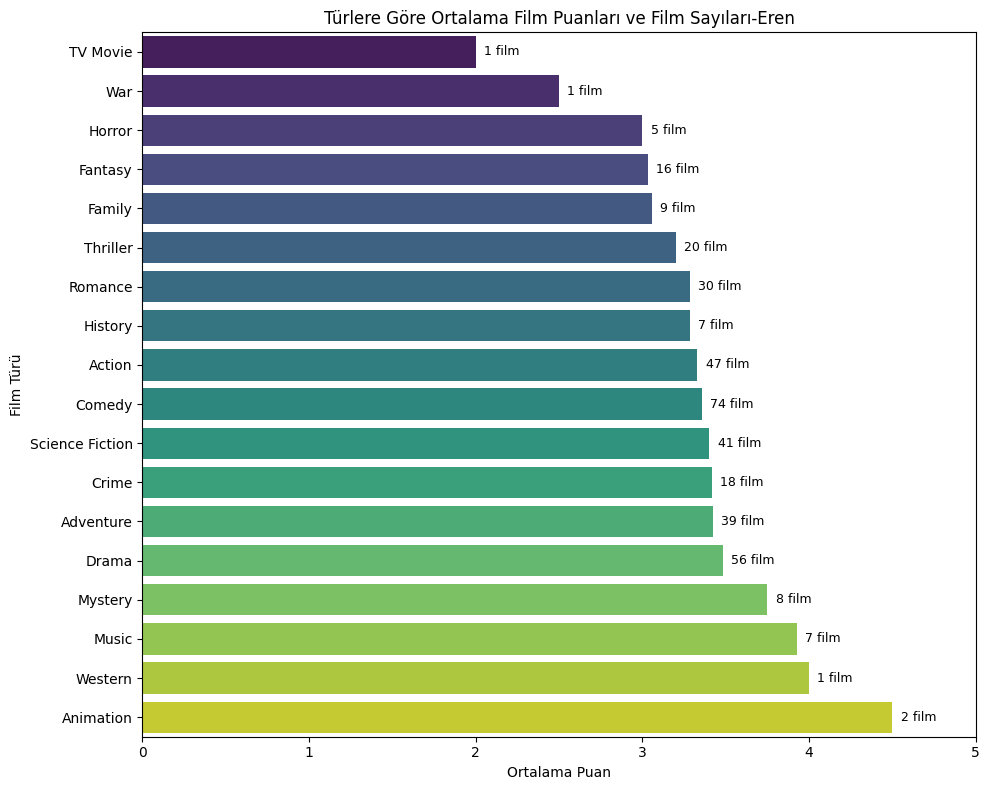

In [13]:
# Her tür için ortalama puan ve film sayısını hesapla
genre_stats = df_exploded.groupby("Genres").agg(
    avg_rating=("Rating", "mean"),
    film_count=("Genres", "count")
).sort_values(by="avg_rating", ascending=True)

# Grafik çizimi
plt.figure(figsize=(10, 8))
ax = sns.barplot(
    x=genre_stats["avg_rating"],
    y=genre_stats.index,
    palette="viridis"
)

# Her barın yanına film sayısını yaz
for i, (value, count) in enumerate(zip(genre_stats["avg_rating"], genre_stats["film_count"])):
    ax.text(value + 0.05, i, f"{count} film", va="center", fontsize=9)

# 4. Grafik ayarları
plt.title("Türlere Göre Ortalama Film Puanları ve Film Sayıları-Eren")
plt.xlabel("Ortalama Puan")
plt.ylabel("Film Türü")
plt.xlim(0, 5)
plt.tight_layout()
plt.show()

In [14]:
df_exploded[df_exploded["Genres"] == "Animation"]


,Date,Film,Rating,Genres
82,2024-06-23,Inside Out 2,4.0,Animation
103,2023-07-29,Spider-Man: Across the Spider-Verse,5.0,Animation


In [15]:
df_exploded[df_exploded["Genres"] == "Mystery"]

,Date,Film,Rating,Genres
20,2025-05-04,It's What's Inside,3.5,Mystery
69,2024-10-18,Don't Worry Darling,3.0,Mystery
83,2024-06-22,Source Code,3.5,Mystery
107,2023-03-11,The Prestige,4.0,Mystery
116,2022-03-04,The Batman,4.5,Mystery
117,2022-01-19,Scream,3.0,Mystery
118,2022-01-13,Shutter Island,4.5,Mystery
130,2021-12-23,Last Night in Soho,4.0,Mystery


In [16]:
df_sevval=pd.read_csv('/content/drive/MyDrive/movie_project/diary_with_genres_sevval.csv')
df_sevval

,Date,Film,Rating,Genres
0,2025/06/01/,Shang-Chi and the Legend of the Ten Rings,★★★,"Adventure, Fantasy, Action"
1,2025/06/01/,Lilo & Stitch,★★★★,"Science Fiction, Comedy, Family"
2,2025/05/24/,Get Smart,★★★½,"Action, Thriller, Comedy"
3,2025/05/18/,21 Jump Street,★★★,"Crime, Action, Comedy"
4,2025/05/08/,Avengers: Age of Ultron,★★★,"Science Fiction, Action, Adventure"
5,2025/05/03/,Thunderbolts*,★★★★,"Science Fiction, Adventure, Action"
6,2025/04/24/,School of Rock,★★★★,"Music, Comedy"
7,2025/04/23/,Ghost Town,★★★,"Comedy, Drama, Fantasy"
8,2025/04/22/,The Fall Guy,★★★½,"Action, Drama, Romance, Comedy"
9,2025/04/21/,Jumanji: Welcome to the Jungle,★★★½,"Action, Comedy, Family, Fantasy, Adventure"


In [17]:
# Tarih sütunundaki fazladan '/' karakterini kaldır
df_sevval["Date"] = df_sevval["Date"].str.strip("/")

# Tarih biçimini belirt: yıl/ay/gün
df_sevval["Date"] = pd.to_datetime(df_sevval["Date"], format="%Y/%m/%d", errors="coerce")

In [18]:
df_sevval["Rating"].value_counts()

,count
Rating,
★★★½,13
★★★,11
★★★★,7
★★½,3
★★★★★,1
★★★★½,1


In [19]:
df_sevval["Genres"] = df_sevval["Genres"].fillna("").apply(lambda x: [genre.strip() for genre in x.split(",")])



In [20]:
df_exploded_sevval = df_sevval.explode("Genres")
df_exploded_sevval

,Date,Film,Rating,Genres
0,2025-06-01,Shang-Chi and the Legend of the Ten Rings,★★★,Adventure
0,2025-06-01,Shang-Chi and the Legend of the Ten Rings,★★★,Fantasy
0,2025-06-01,Shang-Chi and the Legend of the Ten Rings,★★★,Action
1,2025-06-01,Lilo & Stitch,★★★★,Science Fiction
1,2025-06-01,Lilo & Stitch,★★★★,Comedy
...,...,...,...,...
34,2025-02-16,Birds of Prey (and the Fantabulous Emancipatio...,★★½,Crime
35,2025-02-14,Sing,★★★½,Comedy
35,2025-02-14,Sing,★★★½,Music
35,2025-02-14,Sing,★★★½,Animation


In [21]:
df_exploded_sevval["Genres"].value_counts()

,count
Genres,
Comedy,21
Drama,12
Action,11
Romance,11
Adventure,9
Fantasy,9
Science Fiction,8
Family,7
Music,4


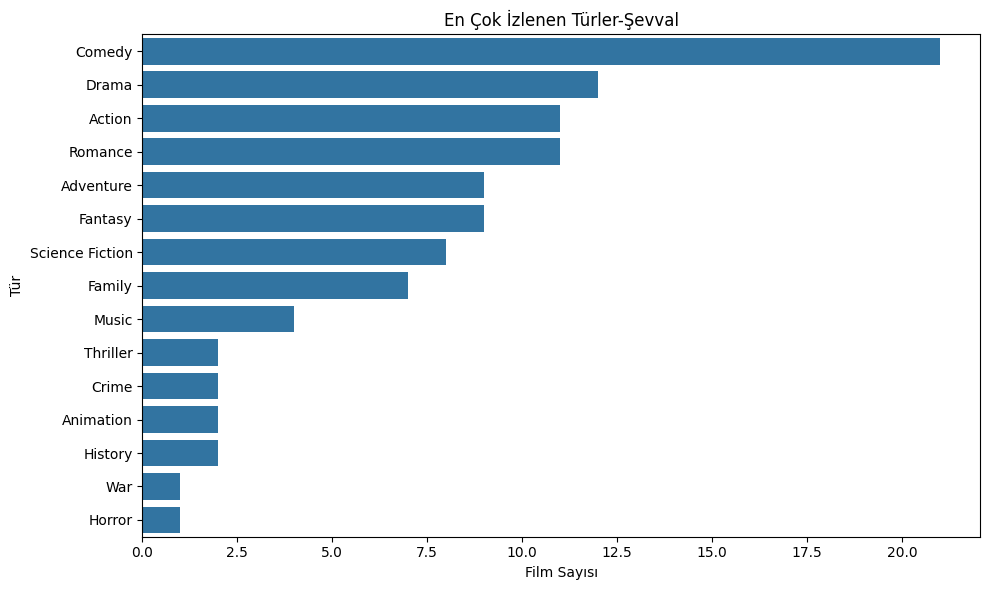

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(y="Genres", data=df_exploded_sevval, order=df_exploded_sevval["Genres"].value_counts().index)
plt.title("En Çok İzlenen Türler-Şevval")
plt.xlabel("Film Sayısı")
plt.ylabel("Tür")
plt.tight_layout()
plt.show()


In [23]:
df_exploded_sevval["Rating"] = df_exploded_sevval["Rating"].apply(star_to_float)

In [24]:
df_exploded_sevval

,Date,Film,Rating,Genres
0,2025-06-01,Shang-Chi and the Legend of the Ten Rings,3.0,Adventure
0,2025-06-01,Shang-Chi and the Legend of the Ten Rings,3.0,Fantasy
0,2025-06-01,Shang-Chi and the Legend of the Ten Rings,3.0,Action
1,2025-06-01,Lilo & Stitch,4.0,Science Fiction
1,2025-06-01,Lilo & Stitch,4.0,Comedy
...,...,...,...,...
34,2025-02-16,Birds of Prey (and the Fantabulous Emancipatio...,2.5,Crime
35,2025-02-14,Sing,3.5,Comedy
35,2025-02-14,Sing,3.5,Music
35,2025-02-14,Sing,3.5,Animation


<ipython-input-25-86486579>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


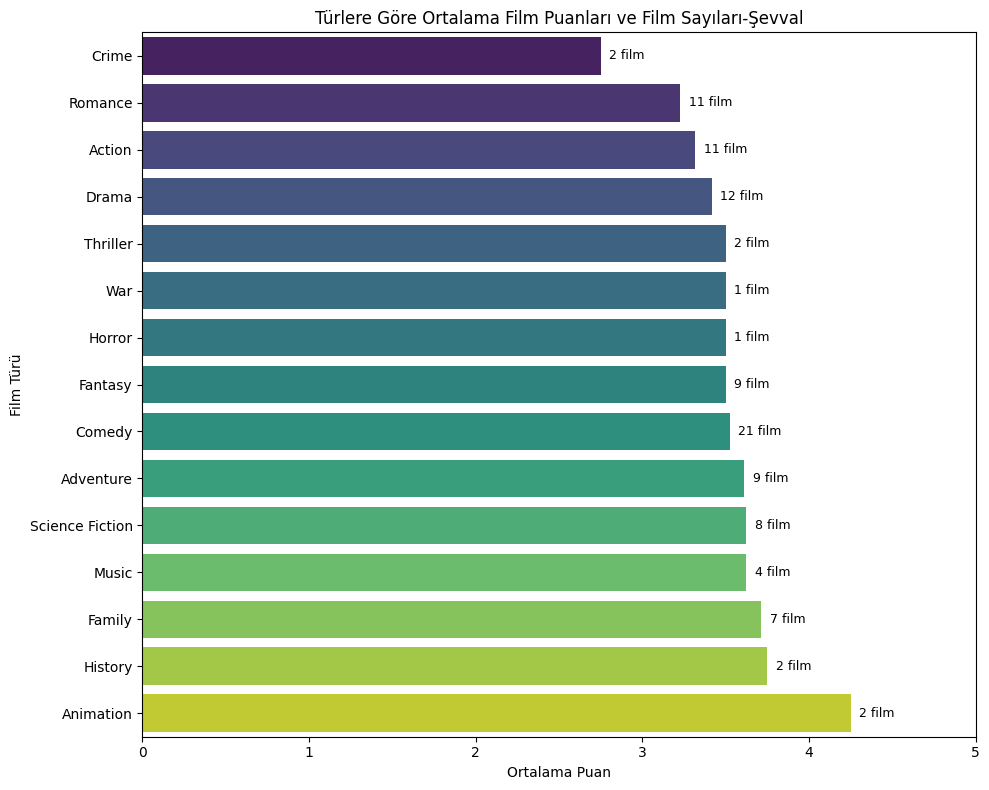

In [25]:
# Her tür için ortalama puan ve film sayısını hesapla
genre_stats = df_exploded_sevval.groupby("Genres").agg(
    avg_rating=("Rating", "mean"),
    film_count=("Genres", "count")
).sort_values(by="avg_rating", ascending=True)

# Grafik çizimi
plt.figure(figsize=(10, 8))
ax = sns.barplot(
    x=genre_stats["avg_rating"],
    y=genre_stats.index,
    palette="viridis"
)

# Her barın yanına film sayısını yaz
for i, (value, count) in enumerate(zip(genre_stats["avg_rating"], genre_stats["film_count"])):
    ax.text(value + 0.05, i, f"{count} film", va="center", fontsize=9)

# 4. Grafik ayarları
plt.title("Türlere Göre Ortalama Film Puanları ve Film Sayıları-Şevval")
plt.xlabel("Ortalama Puan")
plt.ylabel("Film Türü")
plt.xlim(0, 5)
plt.tight_layout()
plt.show()

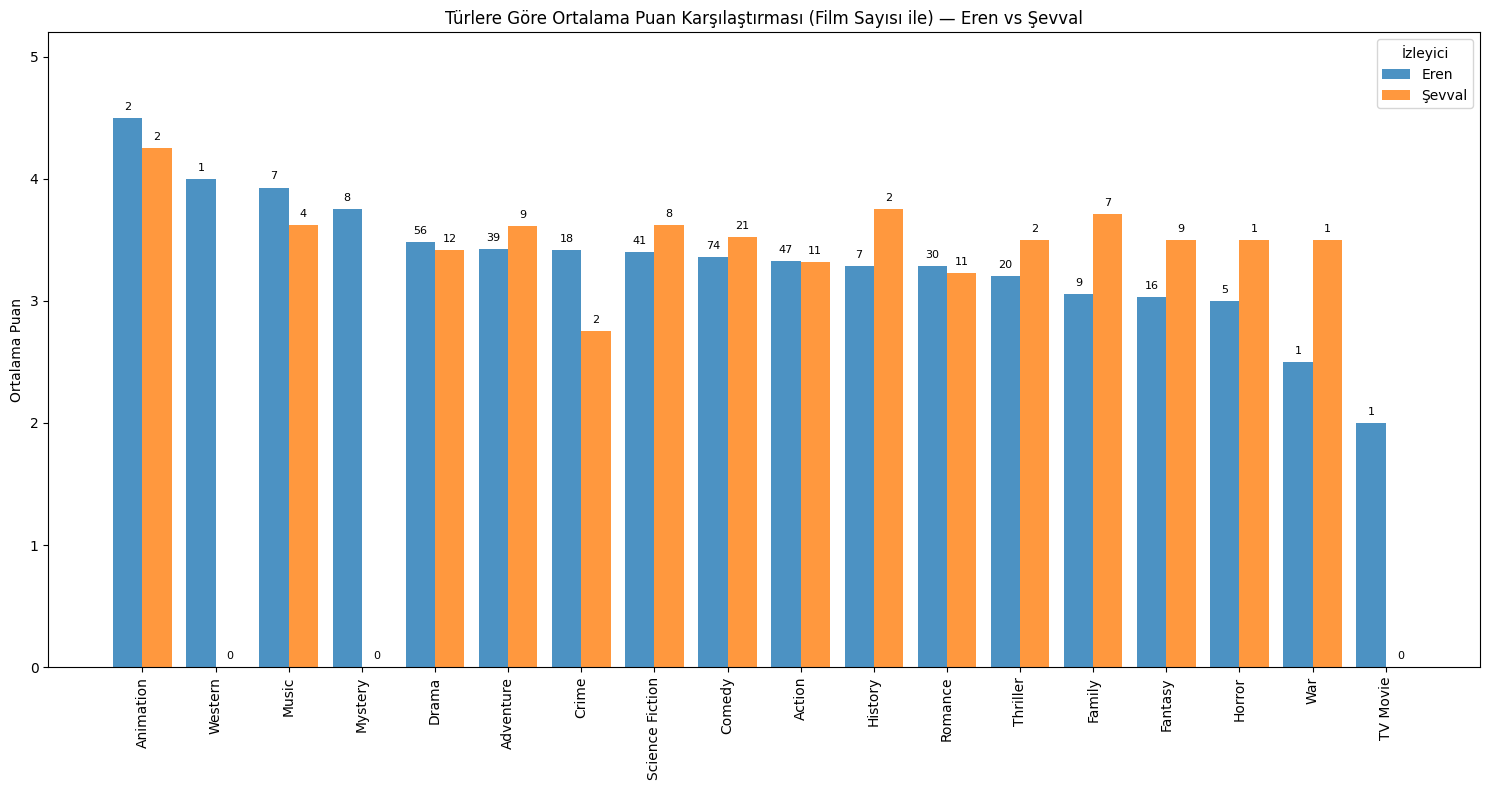

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

# İstatistikleri hesapla
eren_stats = df_exploded.groupby("Genres").agg(
    avg_rating_eren=("Rating", "mean"),
    count_eren=("Genres", "count")
)

sevval_stats = df_exploded_sevval.groupby("Genres").agg(
    avg_rating_sevval=("Rating", "mean"),
    count_sevval=("Genres", "count")
)

# Türlere göre birleştir
merged_stats = pd.merge(eren_stats, sevval_stats, left_index=True, right_index=True, how="outer").fillna(0)

# Sıralama
merged_stats = merged_stats.sort_values(by="avg_rating_eren", ascending=False)

# Grafik: Ortalama Puanlar + Film Sayısı Etiketli
plt.figure(figsize=(15, 8))
bar_width = 0.4
x = range(len(merged_stats))

plt.bar([i - bar_width/2 for i in x], merged_stats["avg_rating_eren"], width=bar_width, label="Eren", alpha=0.8)
plt.bar([i + bar_width/2 for i in x], merged_stats["avg_rating_sevval"], width=bar_width, label="Şevval", alpha=0.8)

# Etiketleri yaz
for i, genre in enumerate(merged_stats.index):
    eren_count = int(merged_stats.loc[genre, "count_eren"])
    sevval_count = int(merged_stats.loc[genre, "count_sevval"])
    eren_rating = merged_stats.loc[genre, "avg_rating_eren"]
    sevval_rating = merged_stats.loc[genre, "avg_rating_sevval"]

    plt.text(i - bar_width/2, eren_rating + 0.05, f"{eren_count}", ha='center', va='bottom', fontsize=8, color="black")
    plt.text(i + bar_width/2, sevval_rating + 0.05, f"{sevval_count}", ha='center', va='bottom', fontsize=8, color="black")

plt.xticks(ticks=x, labels=merged_stats.index, rotation=90)
plt.ylabel("Ortalama Puan")
plt.title("Türlere Göre Ortalama Puan Karşılaştırması (Film Sayısı ile) — Eren vs Şevval")
plt.ylim(0, 5.2)
plt.legend(title="İzleyici")
plt.tight_layout()
plt.show()


In [27]:
df_exploded[df_exploded["Genres"] == "TV Movie"]

,Date,Film,Rating,Genres
52,2024-12-28,High School Musical,2.0,TV Movie


In [28]:
df_exploded_sevval[df_exploded_sevval["Genres"] == "Animation"]

,Date,Film,Rating,Genres
24,2025-03-12,Shrek,5.0,Animation
35,2025-02-14,Sing,3.5,Animation


In [29]:
df_exploded[df_exploded["Genres"] == "Animation"]

,Date,Film,Rating,Genres
82,2024-06-23,Inside Out 2,4.0,Animation
103,2023-07-29,Spider-Man: Across the Spider-Verse,5.0,Animation


In [30]:
df_exploded[df_exploded["Genres"] == "History"]

,Date,Film,Rating,Genres
34,2025-03-08,Turkish Ice Cream,2.5,History
43,2025-01-19,Battle of the Sexes,4.0,History
100,2023-12-26,Ferrari,1.5,History
108,2023-02-03,Ford v Ferrari,4.0,History
120,2022-01-07,Little Women,4.0,History
127,2021-12-30,Spencer,3.5,History
135,2021-12-08,House of Gucci,3.5,History


In [31]:
df_exploded_sevval[df_exploded_sevval["Genres"] == "History"]

,Date,Film,Rating,Genres
26,2025-03-08,Turkish Ice Cream,3.5,History
31,2025-02-22,Battle of the Sexes,4.0,History


In [32]:
# Ortak filmleri al
common_films = set(df["Film"]).intersection(set(df_sevval["Film"]))

# Ortak filmleri filtrele
df_common = df[df["Film"].isin(common_films)][["Date", "Film", "Rating"]].copy()
df_common["Person"] = "Eren"

df_common_sevval = df_sevval[df_sevval["Film"].isin(common_films)][["Date", "Film", "Rating"]].copy()
df_common_sevval["Person"] = "Şevval"

# En son (en yeni) izlenme tarihine göre film başına bir kayıt seç
latest_eren = df_common.sort_values("Date").groupby("Film").tail(1).set_index("Film")
latest_sevval = df_common_sevval.sort_values("Date").groupby("Film").tail(1).set_index("Film")

# Gerekli sütunları yeniden adlandır
latest_eren = latest_eren.rename(columns={"Rating": "Eren", "Date": "Eren_Date"}).drop(columns=["Person"])
latest_sevval = latest_sevval.rename(columns={"Rating": "Şevval", "Date": "Şevval_Date"}).drop(columns=["Person"])

# Tek bir tablo halinde birleştir
merged_common = pd.concat([latest_eren, latest_sevval], axis=1).reset_index()

# Sonuç
merged_common = merged_common[["Film", "Eren", "Şevval", "Eren_Date", "Şevval_Date"]]
merged_common


,Film,Eren,Şevval,Eren_Date,Şevval_Date
0,No Hard Feelings,★★½,★★★½,2024-02-11,2025-04-06
1,The Fall Guy,★★★½,★★★½,2024-04-29,2025-04-22
2,Jumanji: Welcome to the Jungle,★★★★,★★★½,2024-12-23,2025-04-21
3,Battle of the Sexes,★★★★,★★★★,2025-01-19,2025-02-22
4,The Last Song,★★★,★★★,2025-02-17,2025-02-17
5,Anora,★★★★½,★★★★½,2025-02-21,2025-02-22
6,Whisper If I Forget,★★★★,★★★★,2025-02-23,2025-02-23
7,Conclave,★★★,★★★½,2025-02-28,2025-02-28
8,Turkish Ice Cream,★★½,★★★½,2025-03-08,2025-03-08
9,Mickey 17,★★★★,★★★★,2025-03-09,2025-03-09


In [33]:
output_path = "/content/drive/MyDrive/movie_project/common_movies.xlsx"
merged_common.to_excel(output_path, index=False)
print(f"Excel dosyası başarıyla kaydedildi: {output_path}")


Excel dosyası başarıyla kaydedildi: /content/drive/MyDrive/movie_project/common_movies.xlsx


In [34]:
df_exploded[df_exploded["Genres"] == "Romance"]

,Date,Film,Rating,Genres
5,2025-05-23,Dan in Real Life,3.5,Romance
8,2025-05-19,Adventureland,3.0,Romance
9,2025-05-19,Knocked Up,3.0,Romance
14,2025-05-14,American Pie 2,3.0,Romance
15,2025-05-14,American Pie,3.5,Romance
19,2025-05-05,Good Luck Chuck,2.0,Romance
30,2025-04-06,Forgetting Sarah Marshall,4.0,Romance
31,2025-03-24,She's Out of My League,3.0,Romance
32,2025-03-15,Twilight,2.0,Romance
38,2025-02-21,Anora,4.5,Romance


In [35]:
df_exploded_sevval[df_exploded_sevval["Genres"] == "Romance"]

,Date,Film,Rating,Genres
8,2025-04-22,The Fall Guy,3.5,Romance
14,2025-04-06,No Hard Feelings,3.5,Romance
15,2025-04-06,American Pie 2,3.0,Romance
16,2025-04-05,Forgetting Sarah Marshall,3.5,Romance
17,2025-04-05,Just Go with It,3.0,Romance
18,2025-04-01,American Pie,3.5,Romance
20,2025-03-31,In Your Dreams,2.5,Romance
21,2025-03-24,She's Out of My League,2.5,Romance
22,2025-03-15,Twilight,3.0,Romance
32,2025-02-22,Anora,4.5,Romance


In [36]:
df_exploded[df_exploded["Genres"] == "Western"]

,Date,Film,Rating,Genres
129,2021-12-23,The Power of the Dog,4.0,Western
